In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelEncoder

Imported all Necessary Libraries

In [4]:
df=pd.read_csv('data set.csv')

In [5]:
df.head()

,ID,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            999 non-null    int64
 1   Apple         999 non-null    bool 
 2   Bread         999 non-null    bool 
 3   Butter        999 non-null    bool 
 4   Cheese        999 non-null    bool 
 5   Corn          999 non-null    bool 
 6   Dill          999 non-null    bool 
 7   Eggs          999 non-null    bool 
 8   Ice cream     999 non-null    bool 
 9   Kidney Beans  999 non-null    bool 
 10  Milk          999 non-null    bool 
 11  Nutmeg        999 non-null    bool 
 12  Onion         999 non-null    bool 
 13  Sugar         999 non-null    bool 
 14  Unicorn       999 non-null    bool 
 15  Yogurt        999 non-null    bool 
 16  chocolate     999 non-null    bool 
dtypes: bool(16), int64(1)
memory usage: 23.5 KB


In [7]:
df.shape

(999, 17)

In [8]:
df = df.drop('ID', axis=1)

Dropping the ID Feature as it is not relevent in the Market Basket Analysis.

In [9]:
df

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [10]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="bool":
        df[i]=le.fit_transform(df[i])

Converting all the Categorical into Numerical Values using Label Encoder

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    int64
 1   Bread         999 non-null    int64
 2   Butter        999 non-null    int64
 3   Cheese        999 non-null    int64
 4   Corn          999 non-null    int64
 5   Dill          999 non-null    int64
 6   Eggs          999 non-null    int64
 7   Ice cream     999 non-null    int64
 8   Kidney Beans  999 non-null    int64
 9   Milk          999 non-null    int64
 10  Nutmeg        999 non-null    int64
 11  Onion         999 non-null    int64
 12  Sugar         999 non-null    int64
 13  Unicorn       999 non-null    int64
 14  Yogurt        999 non-null    int64
 15  chocolate     999 non-null    int64
dtypes: int64(16)
memory usage: 125.0 KB


Converted all the categorical values into numerical values using LabelEncoder. From datatype Boolean to Integers.

In [12]:
df

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
3,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
995,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0
996,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
997,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,1


In [39]:
df.corr()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
Apple,1.000000,0.028698,0.112522,0.029839,0.125546,0.111076,0.037163,0.061996,0.082008,0.120472,0.076706,0.052443,0.105493,0.071202,0.108351,0.090040
Bread,0.028698,1.000000,0.077365,0.074251,0.073522,0.029486,0.039748,0.097898,0.042580,0.076801,0.070786,0.096865,0.091173,0.077964,0.131557,0.096574
Butter,0.112522,0.077365,1.000000,0.050204,0.082083,0.031781,0.048184,0.142750,0.125698,0.114532,0.121673,0.113965,0.099173,0.076756,0.059252,0.102681
Cheese,0.029839,0.074251,0.050204,1.000000,0.072259,0.066855,0.057479,0.087879,0.145244,0.034132,0.124137,0.091571,0.089589,0.053067,0.046072,0.065039
Corn,0.125546,0.073522,0.082083,0.072259,1.000000,0.074287,0.098650,0.103384,0.119273,0.116184,0.073270,0.082285,0.084395,0.077370,0.077956,0.084501
Dill,0.111076,0.029486,0.031781,0.066855,0.074287,1.000000,0.016876,0.090018,0.039324,0.119308,0.055236,0.131060,0.066759,0.054608,0.073202,0.129500
Eggs,0.037163,0.039748,0.048184,0.057479,0.098650,0.016876,1.000000,-0.002500,0.050953,0.085184,0.074984,0.080087,0.053510,0.077964,0.102377,0.084072
Ice cream,0.061996,0.097898,0.142750,0.087879,0.103384,0.090018,-0.002500,1.000000,0.118205,0.044696,0.093097,0.110356,0.112324,0.105794,0.039689,0.120406
Kidney Beans,0.082008,0.042580,0.125698,0.145244,0.119273,0.039324,0.050953,0.118205,1.000000,0.139345,0.104811,0.022463,0.082668,0.104949,0.092694,0.078607
Milk,0.120472,0.076801,0.114532,0.034132,0.116184,0.119308,0.085184,0.044696,0.139345,1.000000,0.080826,0.077390,0.083710,0.105774,0.081490,0.166497


In [13]:
df.shape

(999, 16)

In [14]:
frequent_itemsets=apriori (df,min_support=0.02,use_colnames=True)

C:\Users\hp1\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
frequent_itemsets.sample(10,random_state=90)

,support,itemsets
2333,0.041041,"(Yogurt, chocolate, Ice cream, Eggs)"
4543,0.033033,"(Cheese, Dill, Kidney Beans, Corn, Onion)"
5348,0.027027,"(Yogurt, Eggs, Milk, Unicorn, Ice cream)"
4180,0.028028,"(Yogurt, Eggs, Butter, Kidney Beans, Corn)"
568,0.091091,"(Yogurt, Onion, Dill)"
2552,0.020020,"(Unicorn, chocolate, Butter, Bread, Apple)"
1117,0.041041,"(Milk, Sugar, Nutmeg, Apple)"
5406,0.026026,"(Yogurt, Sugar, Eggs, Nutmeg, Onion)"
3427,0.022022,"(Cheese, Butter, Corn, Ice cream, Bread)"
844,0.044044,"(Milk, Butter, Nutmeg, Apple)"


In [16]:
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)

In [17]:
rules.sample(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
59231,(Ice cream),"(Yogurt, Onion, Butter, Bread)",0.410410,0.047047,0.023023,0.056098,1.192372,0.003714,1.009588,0.273640
38153,"(chocolate, Apple)","(Milk, Butter, Kidney Beans)",0.183183,0.104104,0.024024,0.131148,1.259773,0.004954,1.031125,0.252451
72399,"(Sugar, Nutmeg, Bread)","(Yogurt, Unicorn)",0.092092,0.184184,0.022022,0.239130,1.298322,0.005060,1.072215,0.253082
97863,"(Onion, Cheese)","(Milk, Yogurt, Ice cream)",0.185185,0.082082,0.020020,0.108108,1.317073,0.004820,1.029181,0.295455
69754,"(Ice cream, chocolate)","(Milk, Kidney Beans, Bread)",0.202202,0.092092,0.021021,0.103960,1.128874,0.002400,1.013245,0.143096
103567,"(Yogurt, Kidney Beans)","(Corn, Unicorn, Eggs)",0.194194,0.087087,0.024024,0.123711,1.420547,0.007112,1.041795,0.367391
19449,"(Dill, chocolate)","(Cheese, Eggs)",0.199199,0.169169,0.045045,0.226131,1.336713,0.011347,1.073606,0.314556
62394,"(Nutmeg, Bread)","(Sugar, Cheese, Eggs)",0.171171,0.081081,0.020020,0.116959,1.442495,0.006141,1.040630,0.370109
49941,(Sugar),"(Milk, Dill, Unicorn, Apple)",0.409409,0.047047,0.026026,0.063570,1.351194,0.006765,1.017644,0.440091
25210,"(Milk, Dill, Unicorn)",(Yogurt),0.091091,0.420420,0.043043,0.472527,1.123940,0.004746,1.098786,0.121325


In [18]:
print("Top 10 Association rule based on Confidence at 0.02 minimum support value\n")
rules.sort_values('confidence',ascending=False)[0:10]


Top 10 Association rule based on Confidence at 0.02 minimum support value



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
118677,"(Milk, Butter, Nutmeg, Corn, Bread)",(Kidney Beans),0.024024,0.408408,0.021021,0.875000,2.142463,0.011209,4.732733,0.546374
118865,"(Sugar, Unicorn, chocolate, Kidney Beans, Bread)",(Yogurt),0.024024,0.420420,0.020020,0.833333,1.982143,0.009920,3.477477,0.507692
47341,"(Sugar, Unicorn, Nutmeg, Apple)",(Corn),0.039039,0.407407,0.031031,0.794872,1.951049,0.015126,2.888889,0.507258
118552,"(Sugar, Cheese, Kidney Beans, Corn, Apple)",(Unicorn),0.028028,0.389389,0.022022,0.785714,2.017811,0.011108,2.849516,0.518959
65573,"(Milk, Corn, Nutmeg, Bread)",(Kidney Beans),0.042042,0.408408,0.033033,0.785714,1.923845,0.015863,2.760761,0.501282
112562,"(Ice cream, Onion, Kidney Beans, Eggs)",(Yogurt),0.032032,0.420420,0.025025,0.781250,1.858259,0.011558,2.649507,0.477146
45428,"(Corn, Onion, Apple, Eggs)",(Sugar),0.040040,0.409409,0.031031,0.775000,1.892971,0.014638,2.624847,0.491406
47854,"(Ice cream, Dill, Apple, Eggs)",(Sugar),0.031031,0.409409,0.024024,0.774194,1.891001,0.011320,2.615473,0.486269
65812,"(Corn, Unicorn, Nutmeg, Bread)",(Kidney Beans),0.035035,0.408408,0.027027,0.771429,1.888866,0.012718,2.588213,0.487667
118426,"(Yogurt, Sugar, Unicorn, Corn, Bread)",(Apple),0.026026,0.383383,0.020020,0.769231,2.006427,0.010042,2.672005,0.515005


In [19]:
num_associations = len(rules)
print(f"Number of association rules generated: {num_associations}")


Number of association rules generated: 119418


In [20]:
frequent_itemsets=apriori (df,min_support=0.03,use_colnames=True)
frequent_itemsets.sample(10,random_state=90)
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
print("Top 10 Association rule based on Confidence at 0.03 minimum support value\n")
rules.sort_values('confidence',ascending=False)[0:10]


C:\Users\hp1\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Association rule based on Confidence at 0.03 minimum support value



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29053,"(Sugar, Unicorn, Nutmeg, Apple)",(Corn),0.039039,0.407407,0.031031,0.794872,1.951049,0.015126,2.888889,0.507258
29535,"(Milk, Corn, Nutmeg, Bread)",(Kidney Beans),0.042042,0.408408,0.033033,0.785714,1.923845,0.015863,2.760761,0.501282
28786,"(Corn, Onion, Apple, Eggs)",(Sugar),0.040040,0.409409,0.031031,0.775000,1.892971,0.014638,2.624847,0.491406
28813,"(Sugar, Unicorn, Apple, Eggs)",(Corn),0.039039,0.407407,0.030030,0.769231,1.888112,0.014125,2.567901,0.489479
29354,"(Milk, Corn, Butter, Bread)",(Kidney Beans),0.043043,0.408408,0.032032,0.744186,1.822161,0.014453,2.312585,0.471496
30103,"(Milk, Corn, Butter, Nutmeg)",(Kidney Beans),0.043043,0.408408,0.032032,0.744186,1.822161,0.014453,2.312585,0.471496
31392,"(Unicorn, Sugar, Cheese, chocolate)",(Kidney Beans),0.042042,0.408408,0.031031,0.738095,1.807248,0.013861,2.258804,0.466276
29052,"(Corn, Sugar, Unicorn, Nutmeg)",(Apple),0.042042,0.383383,0.031031,0.738095,1.925214,0.014913,2.354354,0.501669
29776,"(Sugar, Kidney Beans, chocolate, Bread)",(Yogurt),0.042042,0.420420,0.031031,0.738095,1.755612,0.013356,2.212940,0.449287
30586,"(Onion, Corn, Dill, Kidney Beans)",(Cheese),0.045045,0.404404,0.033033,0.733333,1.813366,0.014817,2.233483,0.469697


In [21]:
num_associations = len(rules)
print(f"Number of association rules generated: {num_associations}")


Number of association rules generated: 31902


In [22]:
frequent_itemsets=apriori (df,min_support=0.04,use_colnames=True)
frequent_itemsets.sample(10,random_state=90)
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
print("Top 10 Association rule based on Confidence at 0.04 minimum support value\n")
rules.sort_values('confidence',ascending=False)[0:10]


C:\Users\hp1\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Association rule based on Confidence at 0.04 minimum support value



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19858,"(Milk, Dill, Unicorn)",(chocolate),0.091091,0.421421,0.062062,0.681319,1.616716,0.023674,1.815540,0.419692
5759,"(Unicorn, Apple, Eggs)",(Corn),0.068068,0.407407,0.046046,0.676471,1.660428,0.018315,1.831650,0.426797
16379,"(Sugar, Unicorn, Cheese)",(Kidney Beans),0.081081,0.408408,0.054054,0.666667,1.632353,0.020940,1.774775,0.421569
9623,"(Dill, Bread, Eggs)",(Yogurt),0.068068,0.420420,0.045045,0.661765,1.574055,0.016428,1.713540,0.391335
19958,"(Dill, Unicorn, Nutmeg)",(chocolate),0.070070,0.421421,0.046046,0.657143,1.559348,0.016517,1.687521,0.385735
15876,"(Yogurt, Cheese, Ice cream)",(Kidney Beans),0.087087,0.408408,0.057057,0.655172,1.604209,0.021490,1.715616,0.412569
15384,"(Milk, Dill, Cheese)",(chocolate),0.084084,0.421421,0.055055,0.654762,1.553699,0.019620,1.675883,0.389091
6121,"(Corn, Onion, Apple)",(Sugar),0.083083,0.409409,0.054054,0.650602,1.589124,0.020039,1.690311,0.404314
20505,"(Onion, Kidney Beans, Eggs)",(Yogurt),0.074074,0.420420,0.048048,0.648649,1.542857,0.016906,1.649573,0.380000
6276,"(Dill, Apple, Eggs)",(Sugar),0.071071,0.409409,0.046046,0.647887,1.582493,0.016949,1.677277,0.396247


In [23]:
num_associations = len(rules)
print(f"Number of association rules generated: {num_associations}")


Number of association rules generated: 22630


In [24]:
frequent_itemsets=apriori (df,min_support=0.05,use_colnames=True)
frequent_itemsets.sample(10,random_state=90)
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
print("Top 10 Association rule based on Confidence at 0.05 minimum support value\n")
rules.sort_values('confidence',ascending=False)[0:10]


Top 10 Association rule based on Confidence at 0.05 minimum support value



C:\Users\hp1\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6596,"(Milk, Dill, Unicorn)",(chocolate),0.091091,0.421421,0.062062,0.681319,1.616716,0.023674,1.815540,0.419692
5981,"(Sugar, Unicorn, Cheese)",(Kidney Beans),0.081081,0.408408,0.054054,0.666667,1.632353,0.020940,1.774775,0.421569
5814,"(Yogurt, Cheese, Ice cream)",(Kidney Beans),0.087087,0.408408,0.057057,0.655172,1.604209,0.021490,1.715616,0.412569
5672,"(Milk, Dill, Cheese)",(chocolate),0.084084,0.421421,0.055055,0.654762,1.553699,0.019620,1.675883,0.389091
3909,"(Corn, Onion, Apple)",(Sugar),0.083083,0.409409,0.054054,0.650602,1.589124,0.020039,1.690311,0.404314
6191,"(Milk, Corn, Nutmeg)",(Kidney Beans),0.085085,0.408408,0.055055,0.647059,1.584343,0.020306,1.676176,0.403123
5630,"(Dill, Onion, Kidney Beans)",(Cheese),0.085085,0.404404,0.055055,0.647059,1.600029,0.020646,1.687521,0.409887
5729,"(Dill, Unicorn, Cheese)",(chocolate),0.082082,0.421421,0.053053,0.646341,1.533718,0.018462,1.635981,0.379107
4888,"(Dill, Unicorn, Butter)",(chocolate),0.079079,0.421421,0.051051,0.645570,1.531886,0.017725,1.632418,0.377025
6638,"(Unicorn, Dill, Onion)",(chocolate),0.093093,0.421421,0.060060,0.645161,1.530917,0.020829,1.630540,0.382395


In [25]:
num_associations = len(rules)
print(f"Number of association rules generated: {num_associations}")


Number of association rules generated: 7086


In [26]:
frequent_itemsets=apriori (df,min_support=0.10,use_colnames=True)
frequent_itemsets.sample(10,random_state=90)
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
print("Top 10 Association rule based on Confidence at 0.10 minimum support value\n")
rules.sort_values('confidence',ascending=False)[0:10]


Top 10 Association rule based on Confidence at 0.10 minimum support value



C:\Users\hp1\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
400,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
388,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
323,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
390,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
256,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125
382,"(Ice cream, Dill)",(chocolate),0.185185,0.421421,0.103103,0.556757,1.321140,0.025062,1.305330,0.298323
329,"(Ice cream, Cheese)",(Kidney Beans),0.187187,0.408408,0.104104,0.556150,1.361749,0.027655,1.332863,0.326828
324,"(Onion, Cheese)",(Dill),0.185185,0.398398,0.102102,0.551351,1.383920,0.028325,1.340919,0.340463
419,"(Milk, Nutmeg)",(Kidney Beans),0.182182,0.408408,0.100100,0.549451,1.345346,0.025695,1.313045,0.313880
281,"(Unicorn, Butter)",(Ice cream),0.182182,0.410410,0.100100,0.549451,1.338783,0.025331,1.308601,0.309425


In [27]:
num_associations = len(rules)
print(f"Number of association rules generated: {num_associations}")


Number of association rules generated: 436


In [28]:
frequent_itemsets=apriori (df,min_support=0.15,use_colnames=True)
frequent_itemsets.sample(10,random_state=90)
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
print("Top 10 Association rule based on Confidence at 0.15 minimum support value\n")
rules.sort_values('confidence',ascending=False)[0:10]


Top 10 Association rule based on Confidence at 0.15 minimum support value



C:\Users\hp1\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
206,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,0.040365,1.207857,0.321413
66,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,0.283728
55,(Bread),(Yogurt),0.384384,0.420420,0.193193,0.502604,1.195480,0.031590,1.165228,0.265614
207,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,0.040365,1.192021,0.330310
148,(Dill),(chocolate),0.398398,0.421421,0.199199,0.500000,1.186461,0.031306,1.157157,0.261231
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,0.254963
93,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583,0.293849
73,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884,0.248150
67,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,0.288629
180,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,0.029246,1.140467,0.245323


In [29]:
num_associations = len(rules)
print(f"Number of association rules generated: {num_associations}")


Number of association rules generated: 238


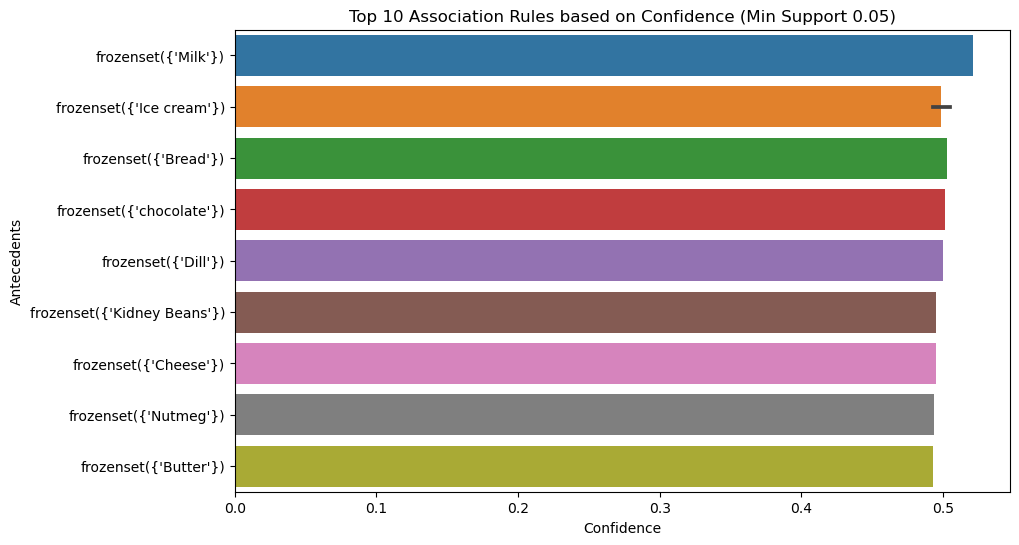

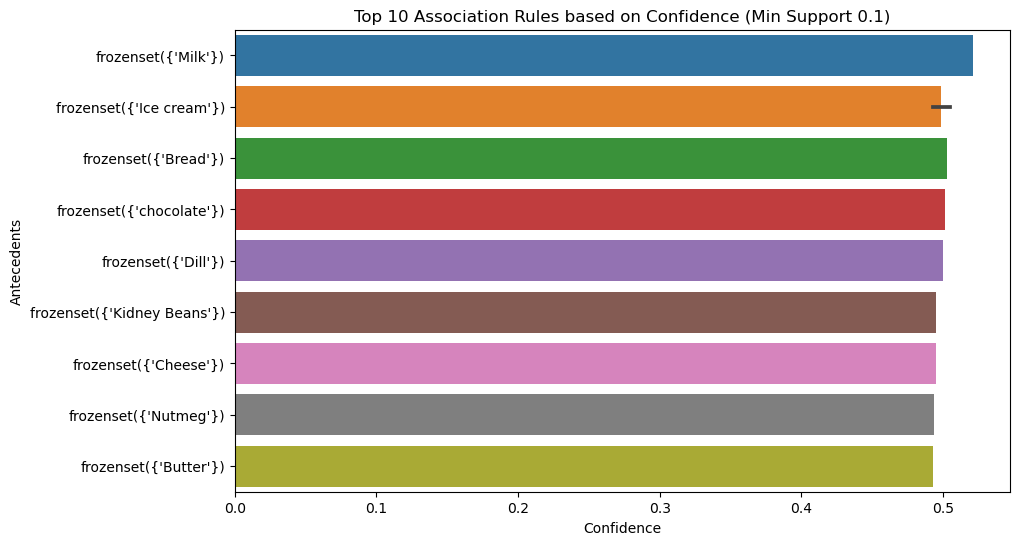

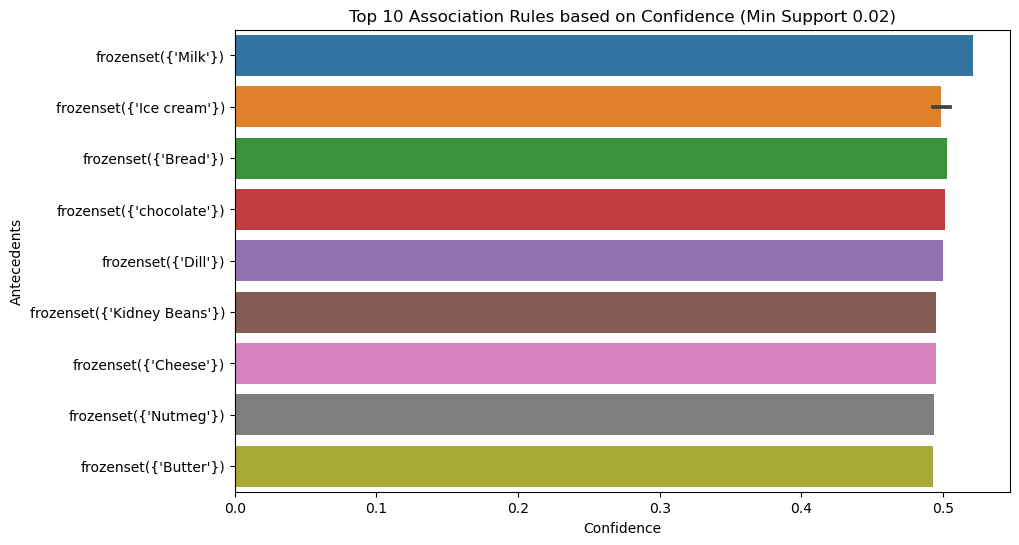

<Figure size 640x480 with 0 Axes>

In [49]:
# prompt: create visualisations for the top 10 association rule based on confidence levels 0.05, 0.1 and 0.15

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already generated rules for min_support 0.05, 0.1, and 0.15 as 'rules_0.05', 'rules_0.1', and 'rules_0.15'
# If not, replace these with your actual rule dataframes

def visualize_top_10_rules(rules, title):
  """Visualizes the top 10 association rules based on confidence."""
  top_10_rules = rules.sort_values('confidence', ascending=False)[:10]
  plt.figure(figsize=(10, 6))
  sns.barplot(x='confidence', y='antecedents', data=top_10_rules)
  plt.title(f'Top 10 Association Rules based on Confidence ({title})')
  plt.xlabel('Confidence')
  plt.ylabel('Antecedents')
  plt.show()

# Visualize for min_support 0.05
visualize_top_10_rules(rules, "Min Support 0.05")

# Visualize for min_support 0.1
visualize_top_10_rules(rules, "Min Support 0.1")

# Visualize for min_support 0.15
visualize_top_10_rules(rules, "Min Support 0.02")
plt.savefig('Association Rules on Different min_Support_value ')


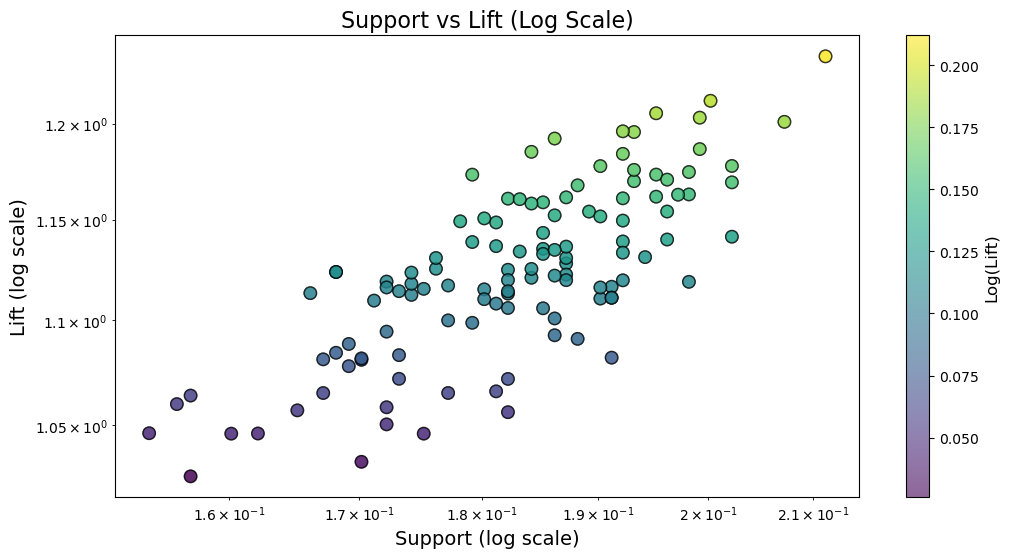

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: Support vs Lift with log scales for better visualization
plt.figure(figsize=(12, 6))

# Color points based on lift for visual clarity
colors = np.log(rules['lift'])

scatter = plt.scatter(
    rules['support'], rules['lift'], alpha=0.6, c=colors, cmap='viridis', s=80, edgecolor='k'
)

# Add colorbar to indicate lift values
cbar = plt.colorbar(scatter)
cbar.set_label('Log(Lift)', fontsize=12)

# Set log scale for better spacing if needed
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.title('Support vs Lift (Log Scale)', fontsize=16)
plt.xlabel('Support (log scale)', fontsize=14)
plt.ylabel('Lift (log scale)', fontsize=14)

# Optional: Enable grid and improve layout
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()
plt.savefig('Support Vs Lift')


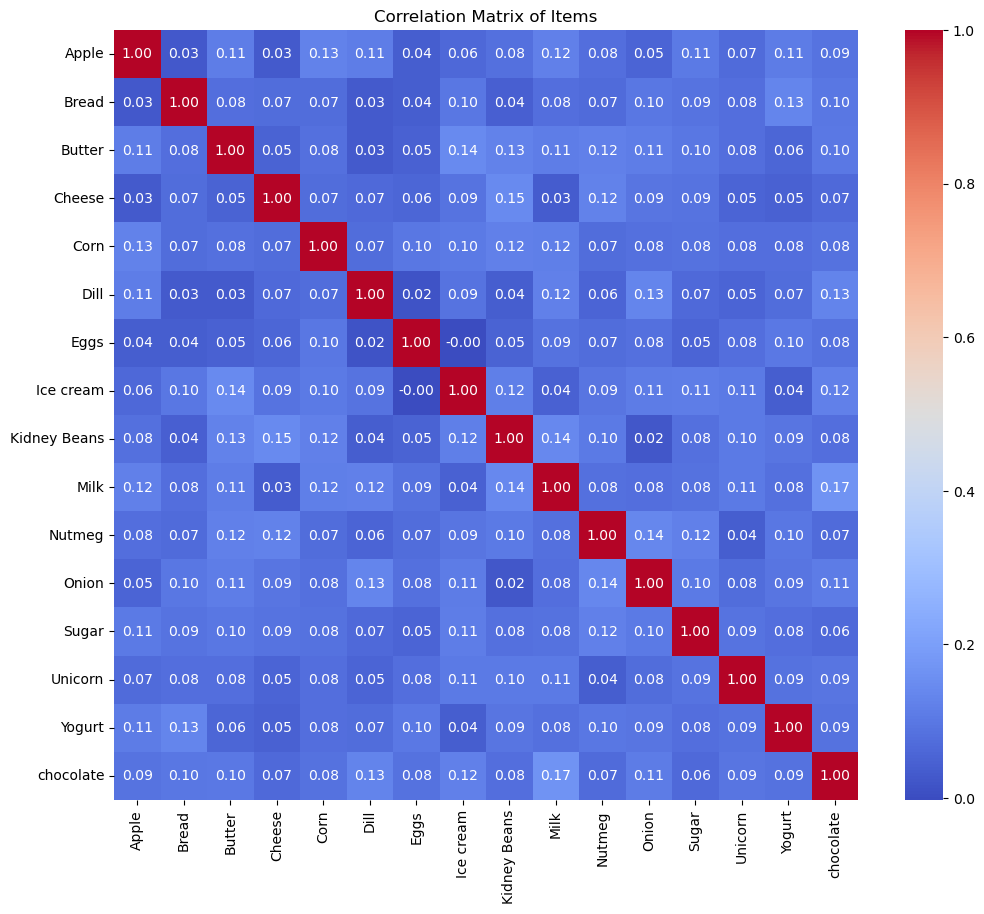

<Figure size 640x480 with 0 Axes>

In [36]:
# prompt: Create a heat map to find association between the items for the market basket analysis

import matplotlib.pyplot as plt
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Items')
plt.show()
plt.savefig('Correlation Matrix of Items')

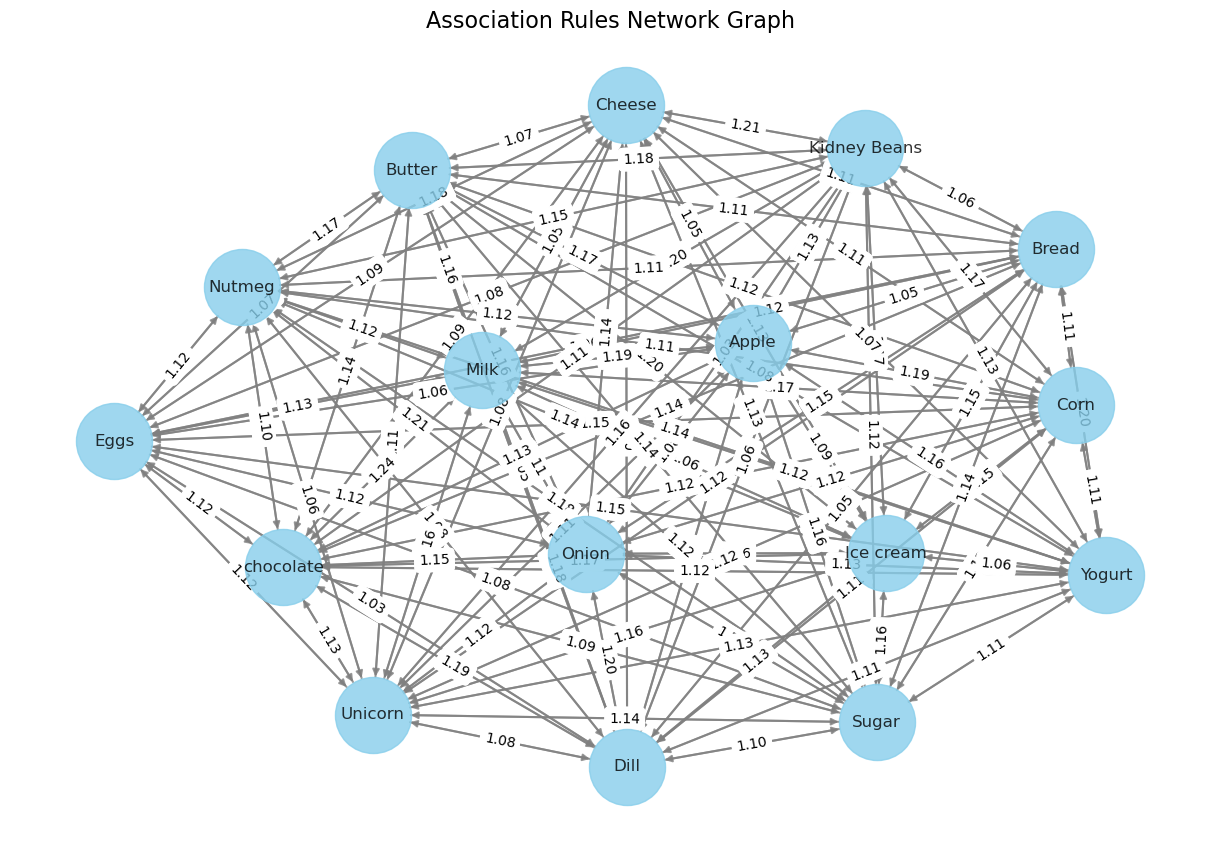

<Figure size 640x480 with 0 Axes>

In [38]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.DiGraph()

# Add edges with weights (lift values) from the association rules
for _, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

# Define the layout for the graph
pos = nx.spring_layout(G, k=0.5, iterations=20)

# Draw the nodes and edges with labels
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12,
        font_color='black', edge_color='gray', width=1.5, alpha=0.8)

# Draw edge labels (lift values)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(k1, k2): f"{v:.2f}" for (k1, k2), v in edge_labels.items()})

plt.title('Association Rules Network Graph', fontsize=16)
plt.show()
plt.savefig('Association Rules Network Graph')
